In [2]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

In [3]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [4]:
roc_curve = RocCurveDisplay.from_estimator

Support Vector Classifier

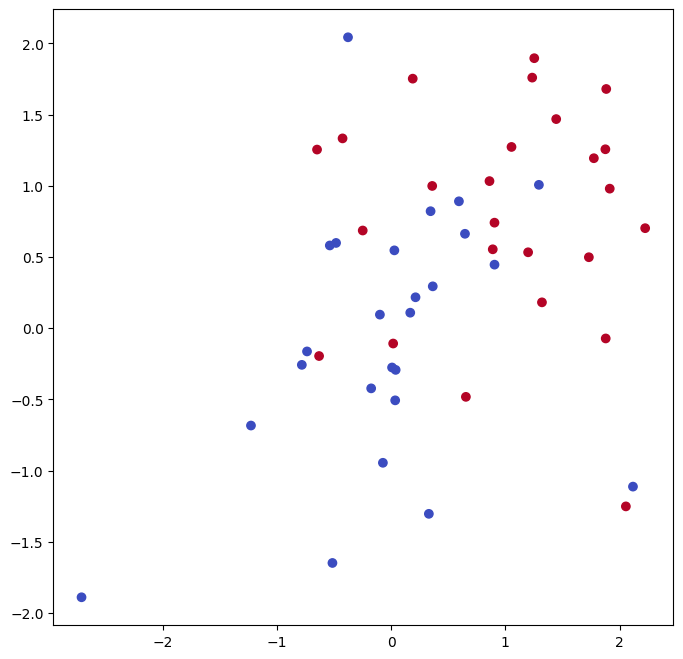

In [6]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25 + [1]*25)
X[y==1] += 1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm)

In [7]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X,y)

SVC(C=10, kernel='linear')

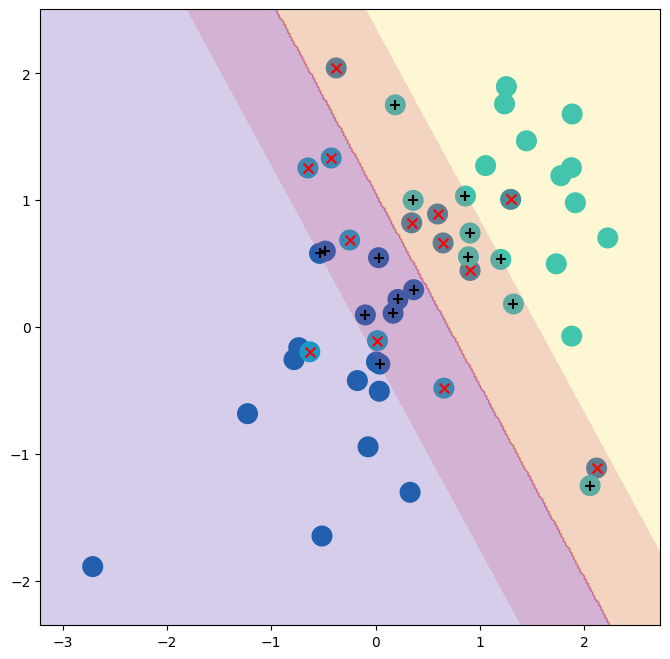

In [8]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_linear,
         ax=ax)

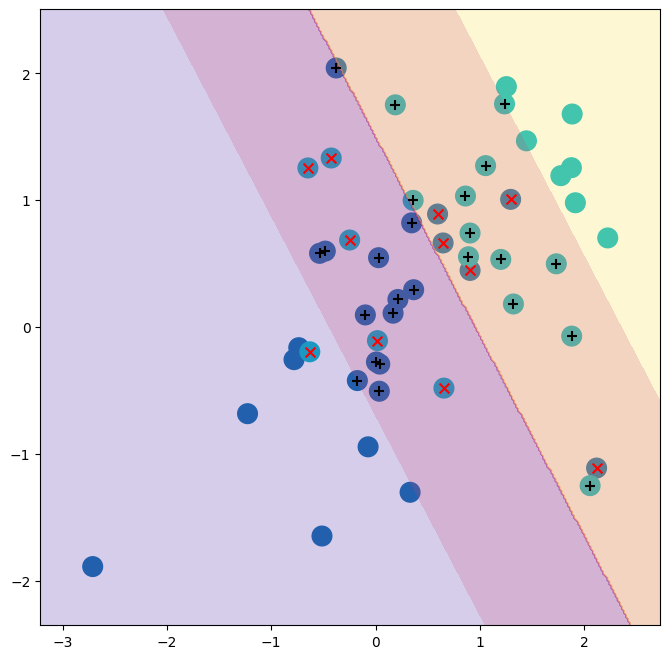

In [9]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X,y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_linear_small,
         ax=ax)

In [10]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [12]:
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001, 0.01, 0.1, 1, 5, 10, 100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X,y)
grid.best_params_

{'C': 1}

In [13]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [14]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10 + [1]*10)
X_test[y_test==1] += 1

In [15]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


In [16]:
svm_ = SVC(C=0.001, 
           kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,2,0
1,8,10


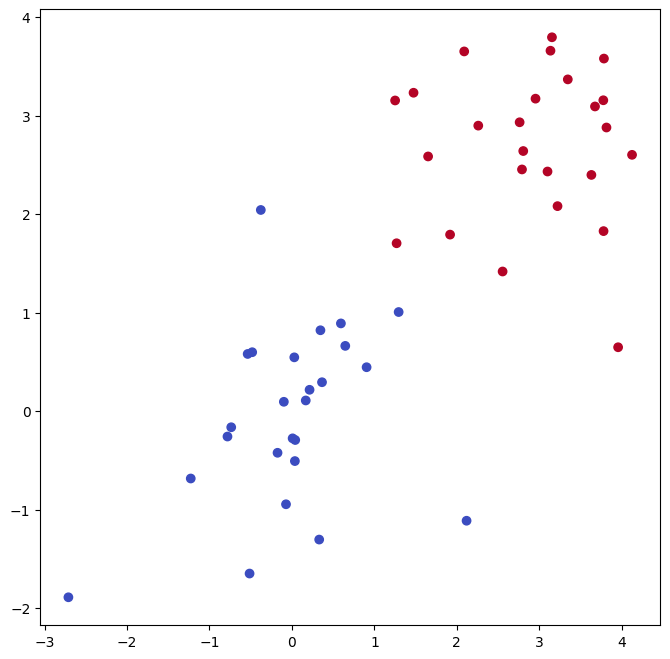

In [17]:
X[y==1] += 1.9
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

In [18]:
svm_ = SVC(C=1e5, kernel='linear').fit(X,y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


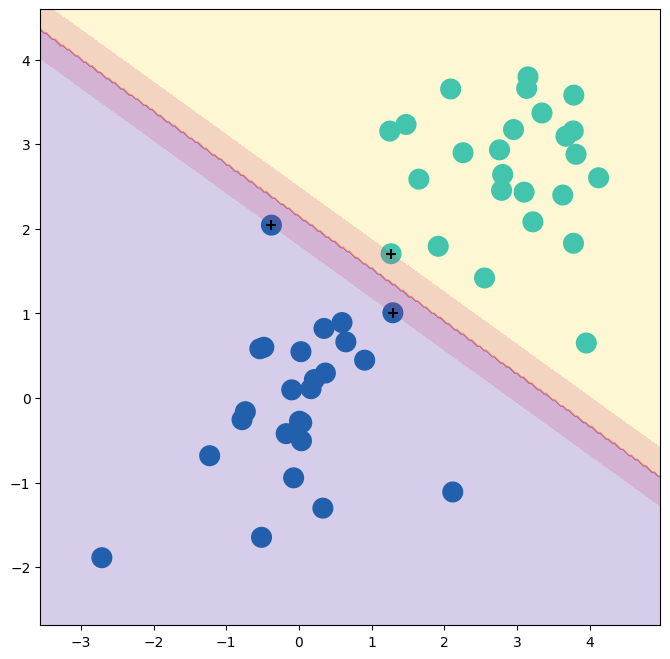

In [19]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_,
         ax=ax)

In [20]:
svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat  = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


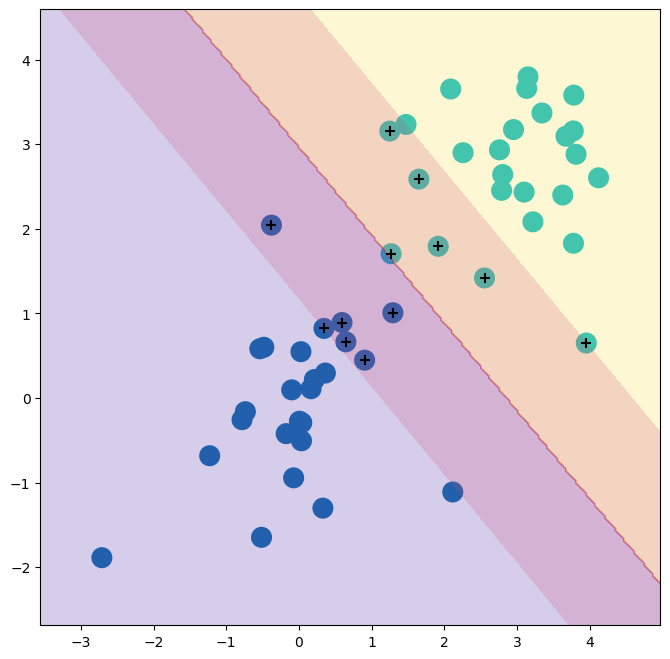

In [21]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_,
         ax=ax)

Support Vector Machine

In [30]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150 + [2]*50)

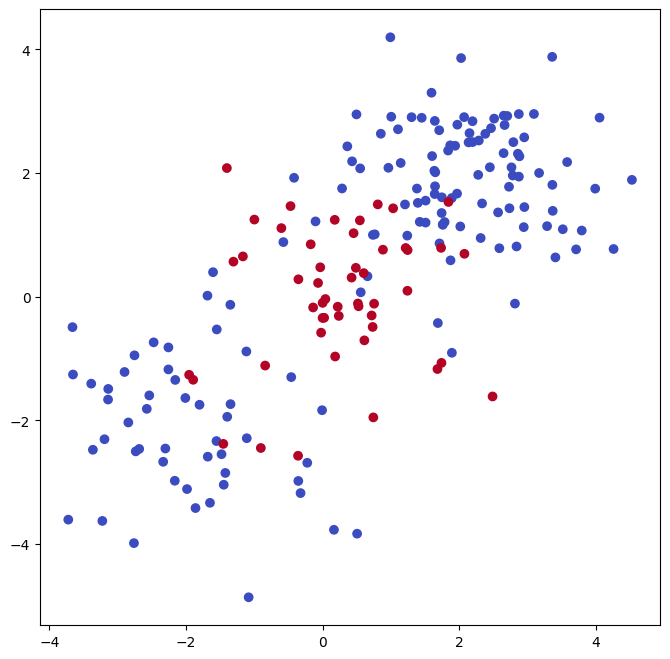

In [31]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

In [ ]:
(X_train, X_test, y_train, y_test) = skm.train_test_split(X,
                                                          y,
                                                          test_size=0.5,
                                                          random_state=0)
svm_rbf = SVC(kernel='rbf', gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=1)

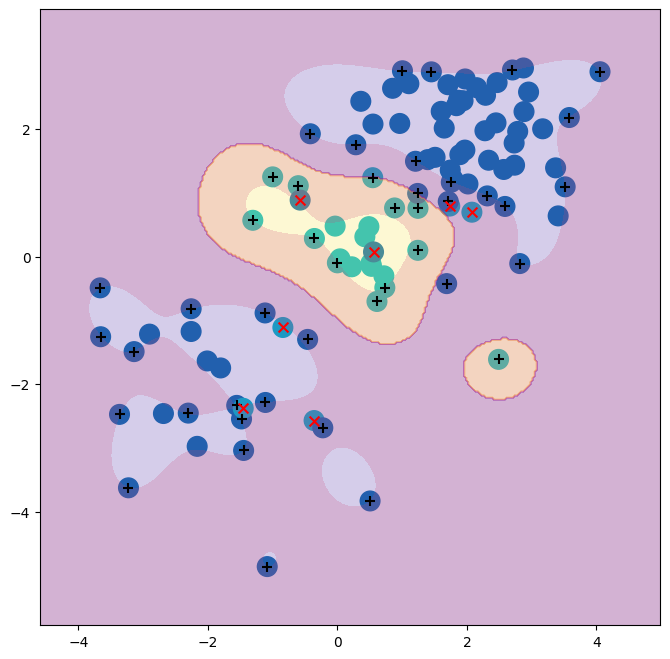

In [33]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         svm_rbf,
         ax=ax)

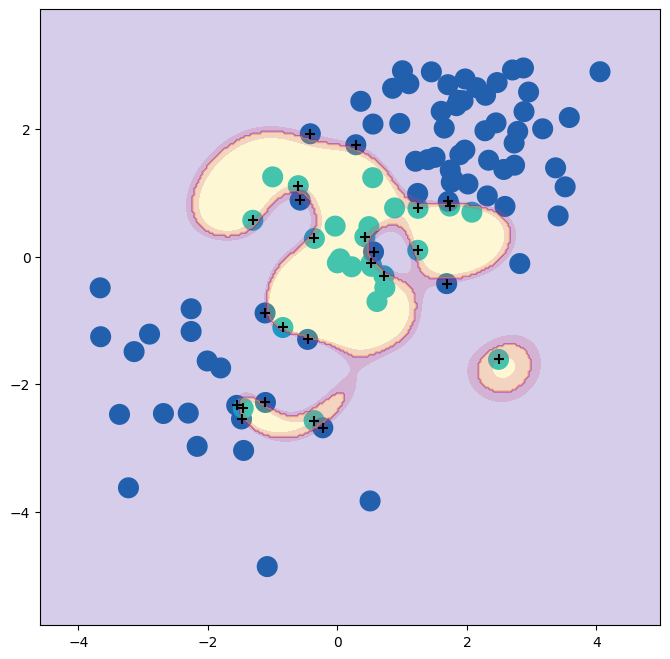

In [34]:
svm_rbf = SVC(kernel='rbf', gamma=1, C=1e5)
svm_rbf.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, 
         y_train,
         svm_rbf,
         ax=ax)

In [35]:
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                        {'C':[0.1, 1, 10, 100, 1000],
                         'gamma':[0.5, 1, 2, 3, 4]},
                         refit=True,
                         cv=kfold,
                         scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

Truth,1,2
Predicted,,
1,67,10
2,8,15


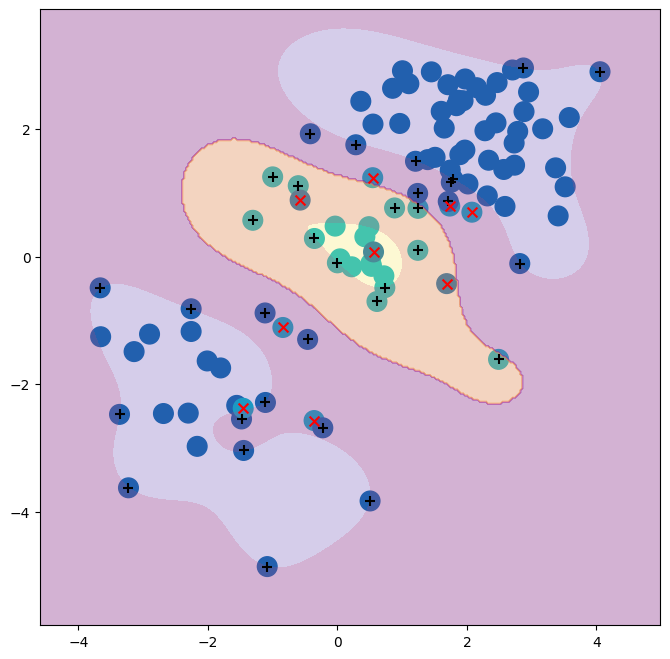

In [37]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         best_svm,
         ax=ax)

y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)

ROC Curves

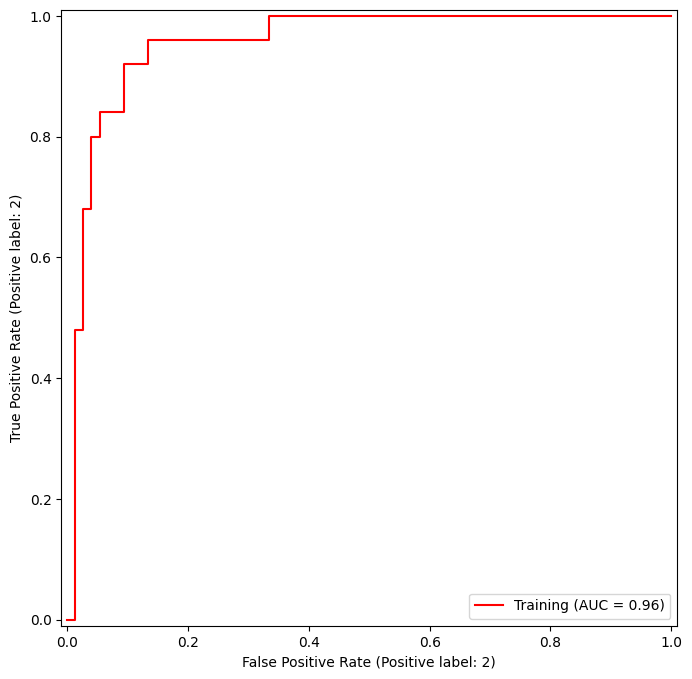

In [38]:
fig, ax = subplots(figsize=(8,8))
roc_curve(best_svm,
          X_train,
          y_train,
          name='Training',
          color='r',
          ax=ax)

<>:9: SyntaxWarning: invalid escape sequence '\g'
<>:9: SyntaxWarning: invalid escape sequence '\g'
C:\Users\room2\AppData\Local\Temp\ipykernel_2080\1036829472.py:9: SyntaxWarning: invalid escape sequence '\g'
  name='Training $\gamma=50$',


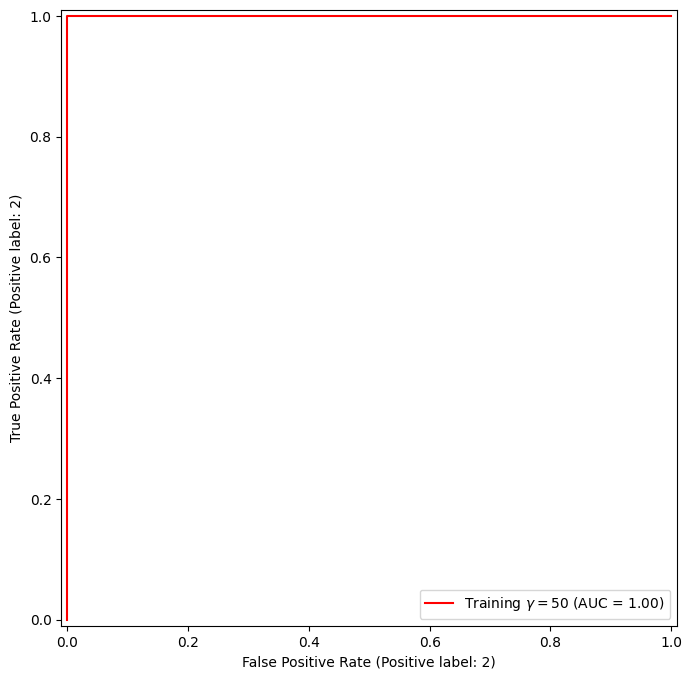

In [39]:
svm_flex = SVC(kernel='rbf',
               gamma=50,
               C=1)
svm_flex.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
roc_curve(svm_flex,
          X_train,
          y_train,
          name='Training $\gamma=50$',
          color='r',
          ax=ax)

<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
C:\Users\room2\AppData\Local\Temp\ipykernel_2080\568156817.py:4: SyntaxWarning: invalid escape sequence '\g'
  name='Test $\gamma=50$',


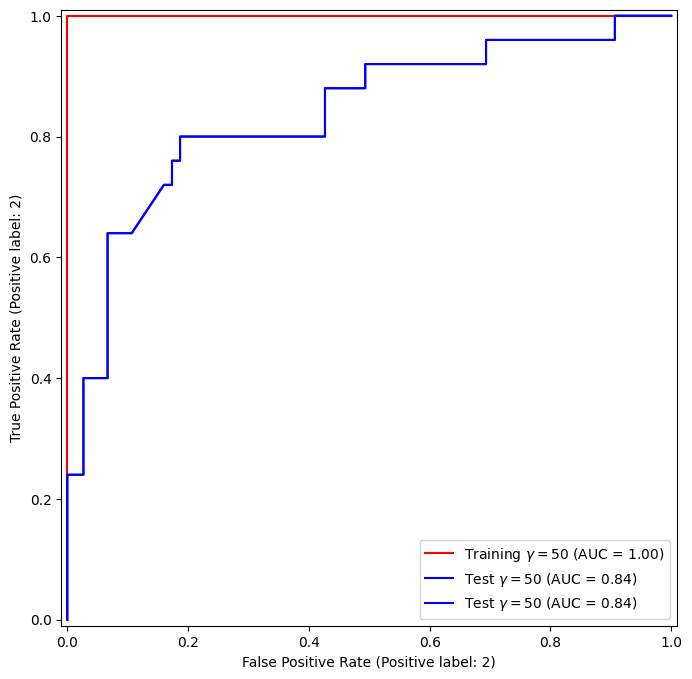

In [42]:
roc_curve(svm_flex, 
          X_test,
          y_test,
          name='Test $\gamma=50$',
          color='b',
          ax=ax)

fig

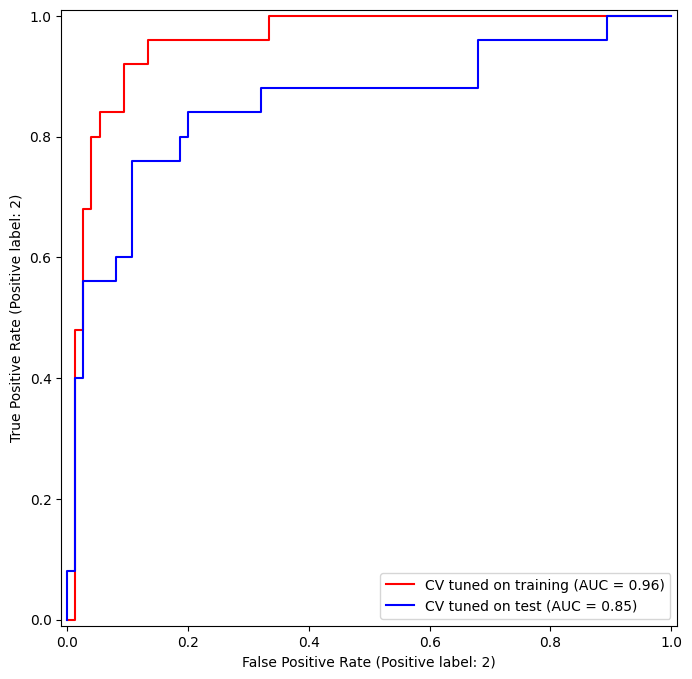

In [44]:
fig, ax = subplots(figsize=(8,8))
for(X_, y_, c, name) in zip(
    (X_train, X_test),
    (y_train, y_test),
    ('r', 'b'),
    ('CV tuned on training',
     'CV tuned on test')):
     roc_curve(best_svm, 
               X_,
               y_,
               name=name,
               ax=ax,
               color=c)

SVM with Multiple Classes

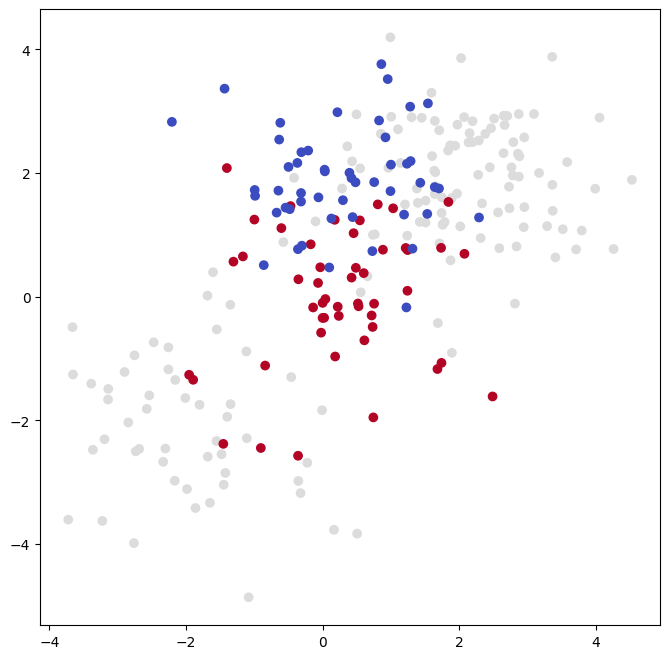

In [46]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

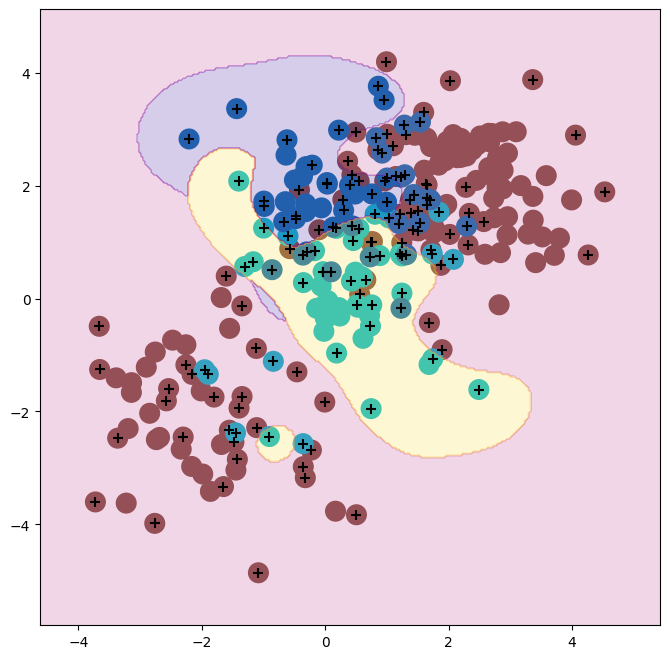

In [47]:
svm_rbf_3 = SVC(kernel='rbf',
                C=10,
                gamma=1,
                decision_function_shape='ovo')

svm_rbf_3.fit(X,y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X, 
         y,
         svm_rbf_3, 
         scatter_cmap=cm.tab10,
         ax=ax)